In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('Sydney_Data.csv')

In [113]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

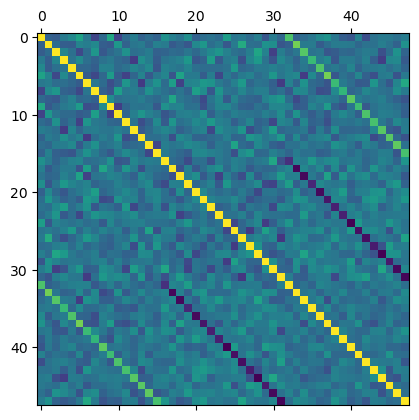

In [114]:
plt.matshow(X.corr())

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [117]:
model.fit(X_train, y_train)
pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])

,Coeff
127.9439,0.000629
264.9656,-0.002296
68.3481,-0.000978
521.757,-0.000495
443.6997,-0.000987
195.9648,0.001281
166.7701,0.000579
504.285,0.001469
104.0226,0.000128
205.2257,0.001468


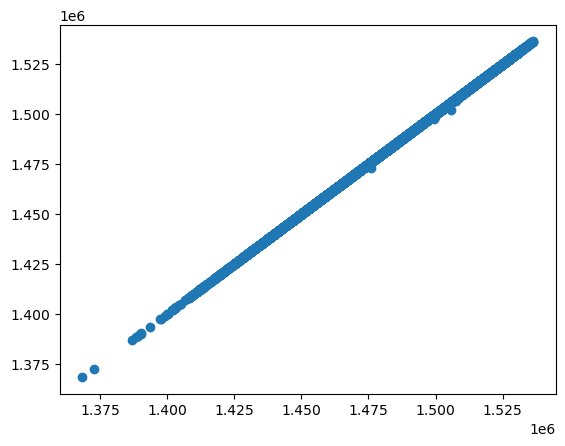

In [123]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

In [124]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

1.1459565691524385

In [129]:
metrics.mean_squared_error(y_test, predictions)

1409.7781780511796

In [126]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

37.54701290450652

In [130]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X, label=y)

xg_reg = xgb.XGBRegressor(objective='reg:linear',
                        )
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:57:40] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


19412359.559917346